# Lab6 Vector Analysis I
----------------------------------

# HOMEWORK ASSIGNMENT

**Answer the following questions in the jupyter notebook file. (You can also use other IDEs to test your code) **

## 1. Tutorial 1 (30 points)

Follow the __tutorial__ at http://net-analysis.com/blog/category/geopandas.html to map data using geopandas. 

You can start from "Introduction" and stop before "Sliding maps" section.

Retype the code from the tutorial in this notebook and produce the final map in this notebook.

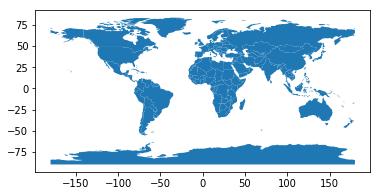

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # Remove the CWD from sys.path while we load stuff.


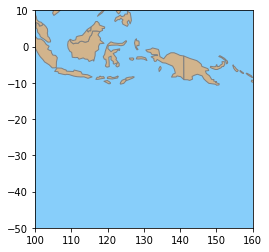

In [6]:
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

water = 'lightskyblue'
earth = 'tan'

ax.set_axis_bgcolor(water)

ax.set_xlim([100, 160])
ax.set_ylim([-50, 10])

# remove Oz
world[world['name']!='Australia'].plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  del sys.path[0]


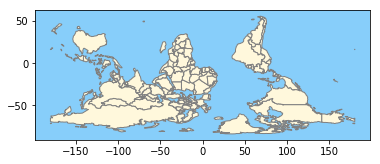

In [10]:
fig, ax = plt.subplots()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# make the default color water
water = 'lightskyblue'
earth = 'cornsilk'
ax.set_axis_bgcolor(water)

# create a GeoSeries from the GeoDataFrame
world2 = world[world['name']!='Antarctica']
wgs = gpd.GeoSeries([g for  g in world2['geometry']])

# rotate world
wgs2 = wgs.rotate(180, origin = (0,0), use_radians=False)

wgs2.plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

## 2. Selecting data (30 points)

Selecting data and plot.

In [15]:
%matplotlib inline
# Import geopandas module
import geopandas as gpd
# Read build-in dataset world ('naturalearth_lowres') and cities('naturalearth_cities') using gpd.read_file()
# hint: Check slides and tasks for detail 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world.head(3)
#cities.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."


In [ ]:
#data prep
#world_noGeo = world[['pop_est', 'continent', 'name','iso_a3','gdp_md_est']]

In [24]:
#Get the data based on coordinates range 
#Get countries and cities in the northern world 
#using .cx by providing a bounding box.
#Hint: Task 2 and http://geopandas.org/indexing.html
world_n = world.cx[:, 0:90]
cities_n = cities.cx[:, 0:90]

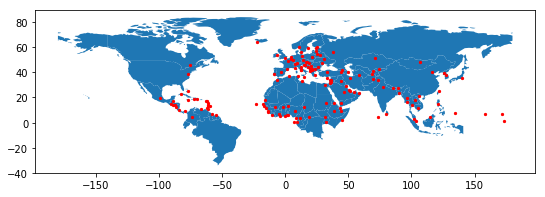

In [27]:
#Then plot the data (cities and countries) on to the same map.
#Hint: Task 3
base = world_n.plot(figsize=(10, 3))
cities_n.plot(ax=base, marker="o", color="red", markersize=5)

## 4. How many crimes happened within 5 km from shopping centers? (40 points)

This question is based on question 5 of lab5.

Last week, we calculate a 5 km buffer around the shoping centers and save it as a shopping_centers_5kmbuffer.shp.

Today we are going to make a spatial join between our point-buffer layer and the crime points layer to find how many crimes happened within 5 km from shopping centers?



In [ ]:
# Import necessary modules
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# read the shopping_centers_5kmbuffer.shp and SAPDCrimes_Jan05.shp 
# in data folder using gpd.readfile()
shpctrs = gpd.read_file(r'C:\Users\casca\Downloads\SimpleAccess\L6\shopping_centers_5kmbuffer.shp')
crime = gpd.read_file(r'C:\Users\casca\Downloads\SimpleAccess\L6\SAPDCrimes_Jan05.shp')
#crime.head(3)

In [35]:
#clear unnecessary colunms
selected_cols = ['CASE_','LOCATION', 'HR','DOW','geometry']
crime = crime[selected_cols]
#crime.head(3)
#shpctrs.head(3)

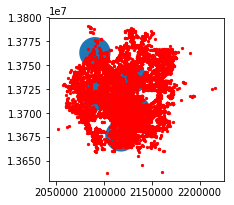

In [33]:
shpctrs.crs=crime.crs
#display the two dataset in one figure for general view. Hint: task3 
%matplotlib inline
base = shpctrs.plot(figsize=(10, 3))
crime.plot(ax=base, marker="o", color="red", markersize=5)

In [39]:
# Make a spatial join between your buffered point layer and crime layer
## Note: Join the information now from buffer layer into the crime layer
# So in the output, each crime will have the corresponding shopping center information
# hint: use gpd.sjoin(left_df, right_df, how='?', op='?')
crime_with_shpctr = gpd.sjoin(crime, shpctrs,how='inner',op='intersects')
#crime_with_shpctr.plot()
crime_with_shpctr

,CASE_,LOCATION,HR,DOW,geometry,index_right,address_x,id,name
0,0372811701,10362 SAHARA DR,12,THU,POINT (2129668.378721582 13740721.96907373),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall
6,0455130401,01211 ARION PRKWY,13,WED,POINT (2135162.380390699 13746399.97125502),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall
10,0463721101,01955 LARKSPUR,19,FRI,POINT (2121001.38197751 13746707.9699753),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall
21,0479098001,00115 W SILVERSANDS,16,FRI,POINT (2128870.379616838 13745595.97151027),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall
35,0487353501,00202 CRAIGMONT,17,MON,POINT (2123866.378332179 13729560.97117534),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall
45,0488940801,10025 SAN PEDRO,20,SUN,POINT (2128412.381280412 13741549.9713785),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall
50,0489270601,12049 BLANCO,17,MON,POINT (2123017.379931388 13747626.96901616),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall
70,0500017401,07011 SAN PEDRO AV,0,SAT,POINT (2127300.378719377 13732906.96900245),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall
72,0500019201,02022 ANCHOR DR,0,SAT,POINT (2119457.378392072 13744130.97157291),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall
75,0500172001,00444 BASSE E,8,SAT,POINT (2135402.381414922 13727800.9691257),0,"7400 San Pedro Ave, San Antonio, TX 78216, USA",1,North Star Mall


In [40]:
# Calculate and display the number of crimes within 5 km for each shopping center
# you can choose one of the following methods
# 1:
# use .value_counts() function, e.g. df1['column1'].value_counts()
# 2:
# use .groupyby() fucntion. first group by name, then iterate over the grouped 
# result to print information for each shopping mall.
crime_with_shpctr['name'].value_counts()

Shops at Rivercenter       2546
North Star Mall            1298
South Park Mall            1038
Ingram Park Mall            984
The Shops at La Cantera     276
Name: name, dtype: int64